In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.io import imread
from skimage.transform import resize

import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

# Advanced DL Architectures

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
x_train.shape

(50000, 32, 32, 3)

Text(0.5, 1.0, '[2]')

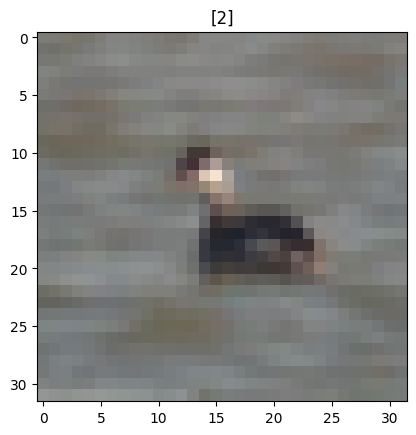

In [11]:
plt.imshow(x_train[1500])
plt.title(y_train[1500])

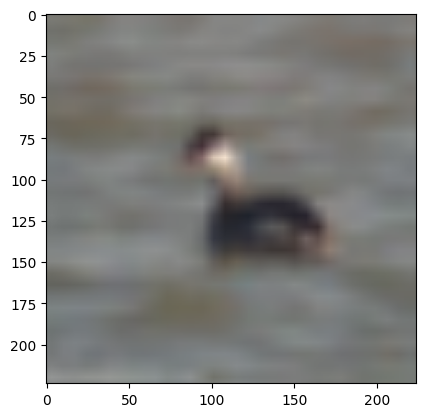

In [12]:
image = x_train[1500]
image_resized = resize(image, (224, 224), preserve_range = True)
plt.imshow(image_resized.astype(int))

In [29]:
decode_predictions(model.predict(tf.expand_dims(preprocess_input(image_resized), 0)), top=20)

1/1 [==============================] - 2s 2s/step


[[('n01855032', 'red-breasted_merganser', 0.82669663),
  ('n04273569', 'speedboat', 0.09253192),
  ('n04285008', 'sports_car', 0.010684403),
  ('n02704792', 'amphibian', 0.009930232),
  ('n03873416', 'paddle', 0.008699331),
  ('n04037443', 'racer', 0.008192218),
  ('n04228054', 'ski', 0.0073079253),
  ('n03444034', 'go-kart', 0.004835258),
  ('n02071294', 'killer_whale', 0.0029441768),
  ('n01795545', 'black_grouse', 0.0023237122),
  ('n02444819', 'otter', 0.0012312129),
  ('n03791053', 'motor_scooter', 0.0011140248),
  ('n09428293', 'seashore', 0.00096310314),
  ('n02066245', 'grey_whale', 0.00096098654),
  ('n01873310', 'platypus', 0.0009585976),
  ('n03240683', 'drilling_platform', 0.00074877404),
  ('n04067472', 'reel', 0.00067367847),
  ('n02132136', 'brown_bear', 0.00062025455),
  ('n04019541', 'puck', 0.0006142195),
  ('n04482393', 'tricycle', 0.0006017785)]]

In [14]:
model = VGG19()

574710816/574710816 [==============================] - 23s 0us/step


In [15]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
np.array([image_resized]).shape

(1, 224, 224, 3)

In [17]:
image_for_model = tf.expand_dims(image_resized, 0)

In [18]:
predictions = model.predict(image_for_model)

1/1 [==============================] - 1s 1s/step


In [19]:
decode_predictions(predictions)

35363/35363 [==============================] - 0s 0us/step


[[('n01855032', 'red-breasted_merganser', 0.16158086),
  ('n02066245', 'grey_whale', 0.082711324),
  ('n09428293', 'seashore', 0.07388817),
  ('n02134084', 'ice_bear', 0.07182758),
  ('n02132136', 'brown_bear', 0.03889739)]]

In [20]:
decode_predictions(model.predict(tf.random.uniform((1, 224, 224, 3), 0, 255)))

1/1 [==============================] - 1s 913ms/step


[[('n03207743', 'dishrag', 0.22602352),
  ('n02834397', 'bib', 0.16135544),
  ('n03980874', 'poncho', 0.11614108),
  ('n04599235', 'wool', 0.05710074),
  ('n04525038', 'velvet', 0.05587367)]]

In [21]:
preprocess_input(image_resized)

array([[[ 8.91814286,  2.07814286, -4.82285714],
        [ 9.34671429,  2.36385714, -4.68      ],
        [ 9.77528571,  2.64957143, -4.53714286],
        ...,
        [19.38753061, 10.03732653,  5.03428571],
        [19.2854898 ,  9.85365306,  4.60571429],
        [19.18344898,  9.66997959,  4.17714286]],

       [[10.20385714,  3.50671429, -3.25142857],
        [10.63242857,  3.79242857, -3.10857143],
        [11.061     ,  4.07814286, -2.96571429],
        ...,
        [18.32630612,  9.09855102,  4.32      ],
        [18.30589796,  8.97610204,  3.89142857],
        [18.2854898 ,  8.85365306,  3.46285714]],

       [[11.48957143,  4.93528571, -1.68      ],
        [11.91814286,  5.221     , -1.53714286],
        [12.34671429,  5.50671429, -1.39428571],
        ...,
        [17.26508163,  8.15977551,  3.60571429],
        [17.32630612,  8.09855102,  3.17714286],
        [17.38753061,  8.03732653,  2.74857143]],

       ...,

       [[40.63242857, 28.58834694, 19.68734694],
        [41

In [22]:
image_resized

array([[[-4.82285714,  2.07814286,  8.91814286],
        [-4.68      ,  2.36385714,  9.34671429],
        [-4.53714286,  2.64957143,  9.77528571],
        ...,
        [ 5.03428571, 10.03732653, 19.38753061],
        [ 4.60571429,  9.85365306, 19.2854898 ],
        [ 4.17714286,  9.66997959, 19.18344898]],

       [[-3.25142857,  3.50671429, 10.20385714],
        [-3.10857143,  3.79242857, 10.63242857],
        [-2.96571429,  4.07814286, 11.061     ],
        ...,
        [ 4.32      ,  9.09855102, 18.32630612],
        [ 3.89142857,  8.97610204, 18.30589796],
        [ 3.46285714,  8.85365306, 18.2854898 ]],

       [[-1.68      ,  4.93528571, 11.48957143],
        [-1.53714286,  5.221     , 11.91814286],
        [-1.39428571,  5.50671429, 12.34671429],
        ...,
        [ 3.60571429,  8.15977551, 17.26508163],
        [ 3.17714286,  8.09855102, 17.32630612],
        [ 2.74857143,  8.03732653, 17.38753061]],

       ...,

       [[19.68734694, 28.58834694, 40.63242857],
        [20

In [23]:
model_backbone = VGG19(include_top = False)

80134624/80134624 [==============================] - 4s 0us/step


In [24]:
model_backbone.predict(tf.expand_dims(image, 0)).shape

1/1 [==============================] - 0s 282ms/step


(1, 1, 1, 512)

In [25]:
model_backbone.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [26]:
custom_model = Model(inputs = model_backbone.input, outputs = model_backbone.layers[11].output)

In [27]:
custom_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [28]:
new_model = Dense()(custom_model)
new_model = Dense()(new_model)
new_model = Dense()(new_model)
new_model = Dense()(new_model)
new_model = Dense()(new_model)

NameError: name 'Dense' is not defined

In [31]:
list(reversed(model.layers))